In [1]:
%pip install tensorflow pandas numpy matplotlib

   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ---------------------- --------------- 524.3/895.7 kB 233.0 kB/s eta 0:00:02
   ---------------------- --------------- 524.3/895.7 kB 233.0 kB/s eta 0:00:02
   ---------------------- --------------- 524.3/895.7 kB 233.0 kB/s eta 0:00:02
   ---------------------- --------------- 524.3/895.7 kB 233.0 kB/s eta 0:00:02
   --------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.56.2 requires protobuf>=4.21.6, but you have protobuf 3.19.6 which is incompatible.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
class SchedulingEnv:
    def __init__(self, timetable, productive_hours):
        self.timetable = timetable
        self.productive_hours = productive_hours
        self.state = self.reset()

    def reset(self):
        self.state = np.zeros(len(self.timetable))
        return self.state

    def step(self, action):
        reward = 0
        done = False
        if self.timetable[action] == 0:
            self.state[action] = 1
            reward = 1 if action in self.productive_hours else -1
        else:
            reward = -1
        if np.sum(self.state) == len(self.timetable):
            done = True
        return self.state, reward, done, {}

    def render(self):
        print(self.state)


In [4]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = np.random.choice(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [6]:
def replay(self, batch_size):
    minibatch = np.array(self.memory)
    indices = np.random.choice(len(minibatch), batch_size, replace=False)
    minibatch = minibatch[indices]
    for state, action, reward, next_state, done in minibatch:
        target = reward
        if not done:
            target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
        target_f = self.model.predict(state)
        target_f[0][action] = target
        self.model.fit(state, target_f, epochs=1, verbose=0)
    if self.epsilon > self.epsilon_min:
        self.epsilon *= self.epsilon_decay


In [7]:
state = env.reset()
state = np.reshape(state, [1, state_size])
for time in range(24):
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    state = next_state
    env.render()
    if done:
        break


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0

Hour 00:00 - 00:59: 1.00
Hour 01:00 - 01:59: 0.97
Hour 02:00 - 02:59: 0.97
Hour 03:00 - 03:59: 1.00
Hour 04:00 - 04:59: 0.99
Hour 05:00 - 05:59: 1.00
Hour 06:00 - 06:59: 0.99
Hour 07:00 - 07:59: 0.98
Hour 08:00 - 08:59: 1.00
Hour 09:00 - 09:59: 1.00
Hour 10:00 - 10:59: 1.00
Hour 11:00 - 11:59: 0.99
Hour 12:00 - 12:59: 0.99
Hour 13:00 - 13:59: 1.00
Hour 14:00 - 14:59: 0.98
Hour 15:00 - 15:59: 0.98
Hour 16:00 - 16:59: 1.00
Hour 17:00 - 17:59: 1.00
Hour 18:00 - 18:59: 1.00
Hour 19:00 - 19:59: 0.99
Hour 20:00 - 20:59: 0.97
Hour 21:00 - 21:59: 1.00
Hour 22:00 - 22:59: 1.00
Hour 23:00 - 23:59: 0.95


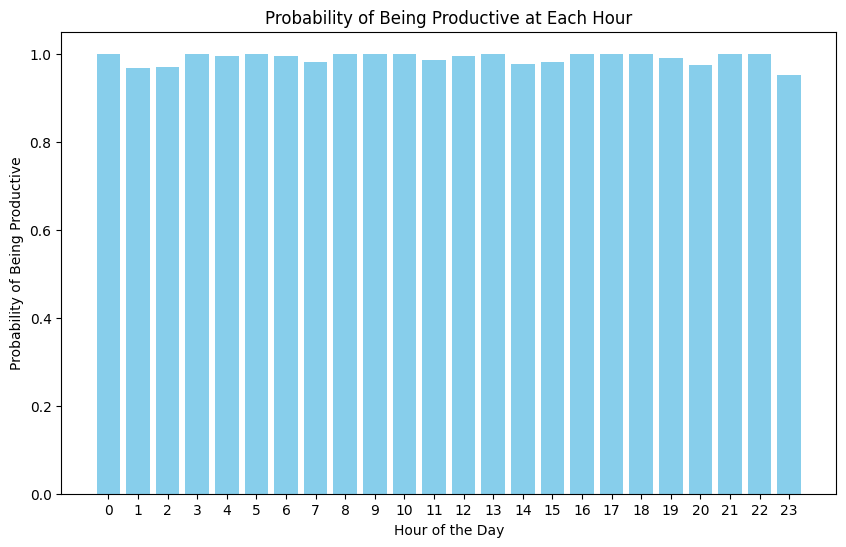

In [11]:
# Initialize variables to store scheduling counts
time_slots = 24
scheduling_counts = np.zeros(time_slots)

# Run multiple episodes to gather data
episodes = 1000
for e in range(episodes):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    for time in range(time_slots):
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        state = next_state
        scheduling_counts[action] += 1
        if done:
            break

# Calculate probabilities
probabilities = scheduling_counts / episodes

# Ensure probabilities are between 0 and 1
probabilities = np.clip(probabilities, 0, 1)

# Print probabilities with time ranges
for hour, prob in enumerate(probabilities):
    print(f"Hour {hour:02d}:00 - {hour:02d}:59: {prob:.2f}")

# Plot probabilities
plt.figure(figsize=(10, 6))
plt.bar(range(time_slots), probabilities, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Probability of Being Productive')
plt.title('Probability of Being Productive at Each Hour')
plt.xticks(range(time_slots))
plt.show()


In [12]:
# Print time slots with a probability of 1.00
for hour, prob in enumerate(probabilities):
    if prob == 1.00:
        print(f"Hour {hour:02d}:00 - {hour:02d}:59: {prob:.2f}")


Hour 00:00 - 00:59: 1.00
Hour 03:00 - 03:59: 1.00
Hour 05:00 - 05:59: 1.00
Hour 08:00 - 08:59: 1.00
Hour 09:00 - 09:59: 1.00
Hour 10:00 - 10:59: 1.00
Hour 13:00 - 13:59: 1.00
Hour 16:00 - 16:59: 1.00
Hour 17:00 - 17:59: 1.00
Hour 21:00 - 21:59: 1.00
Hour 22:00 - 22:59: 1.00
